# World University Ranking

Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.

So in this project we will sort the best university according to their rankings.In this notebook we are going to load and read the data using pandas, do the cleaning ofthe data, and analyze thedata using diffrent parameters, lastly we a going to visually reprent data using matplotlib and seaborn.

In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: unnati22
Your Kaggle Key: ········


100%|██████████| 1.41M/1.41M [00:00<00:00, 146MB/s]

The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = './world-university-rankings'

In [7]:
import os
os.listdir(data_dir)

['cwurData.csv',
 'school_and_country_table.csv',
 'educational_attainment_supplementary_data.csv',
 'timesData.csv',
 'education_expenditure_supplementary_data.csv',
 'shanghaiData.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "world-university-rankings" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "um22012001/world-university-rankings" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/um22012001/world-university-rankings


'https://jovian.ml/um22012001/world-university-rankings'

## Data Preparation and Cleaning

As the data set contain vast amount of information , we are going to import the libraries we will use in the notebook and read the data , handle the null values and understand the data so that we can analyze the data further.


In [12]:
#We are importing the library we will need in our project here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
university_df=pd.read_csv(data_dir + "/cwurData.csv")

type(university_df)

pandas.core.frame.DataFrame

In [14]:
university_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [15]:
#We will use info() function to get the basic information about our dataset
university_df.info()
#.shape gives the tuple of the rows and the columns 
university_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


(2200, 14)

In [16]:
#we use .columns to get the list of columns values in a data frame

university_df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [17]:
## using head  function to retreive the data

university_df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [18]:
## using tail function to retreive the data

university_df.tail(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2190,991,Xidian University,China,81,367,542,218,830,974,812,984.0,434,44.03,2015
2191,992,Federal University of Bahia,Brazil,17,367,540,218,962,865,645,969.0,774,44.03,2015
2192,993,Southwest Jiaotong University,China,82,367,327,218,937,962,812,998.0,861,44.03,2015
2193,994,Ryerson University,Canada,33,367,567,218,811,969,511,975.0,756,44.03,2015
2194,995,King Abdulaziz University,Saudi Arabia,4,367,449,218,595,430,645,994.0,839,44.03,2015
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [19]:
# let find the nunique values in the data frame,it ignores the nan values


university_df.nunique()

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

In [20]:
## We check for Null values using isnull() function

university_df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

<AxesSubplot:>

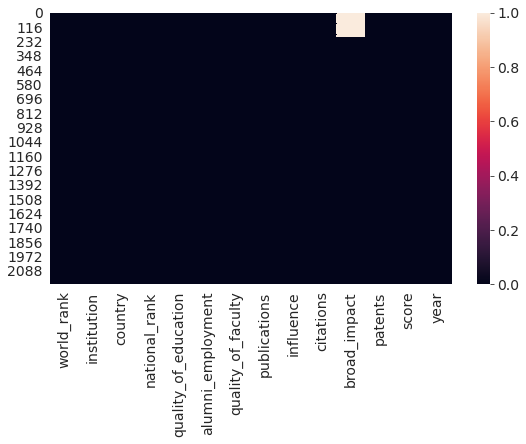

In [21]:
## this is the visual representation of above

sns.heatmap(university_df.isnull())

In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "um22012001/world-university-rankings" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/um22012001/world-university-rankings


'https://jovian.ml/um22012001/world-university-rankings'

## Exploratory Analysis and Visualization

In this section we ask interesting questions to analyze the data and draw some conclusions based on the analysis.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [38]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

How many different countries have world's best university?

In [39]:
different_countries = university_df.groupby('country').count().sort_values('country',ascending=False)

different_countries.reset_index(inplace=True)

different_countries

,country,world_rank,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,Uruguay,2,2,2,2,2,2,2,2,2,2,2,2,2
1,United Kingdom,144,144,144,144,144,144,144,144,144,129,144,144,144
2,United Arab Emirates,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Uganda,2,2,2,2,2,2,2,2,2,2,2,2,2
4,USA,573,573,573,573,573,573,573,573,573,458,573,573,573
5,Turkey,20,20,20,20,20,20,20,20,20,20,20,20,20
6,Thailand,6,6,6,6,6,6,6,6,6,6,6,6,6
7,Taiwan,46,46,46,46,46,46,46,46,46,46,46,46,46
8,Switzerland,26,26,26,26,26,26,26,26,26,18,26,26,26
9,Sweden,24,24,24,24,24,24,24,24,24,22,24,24,24


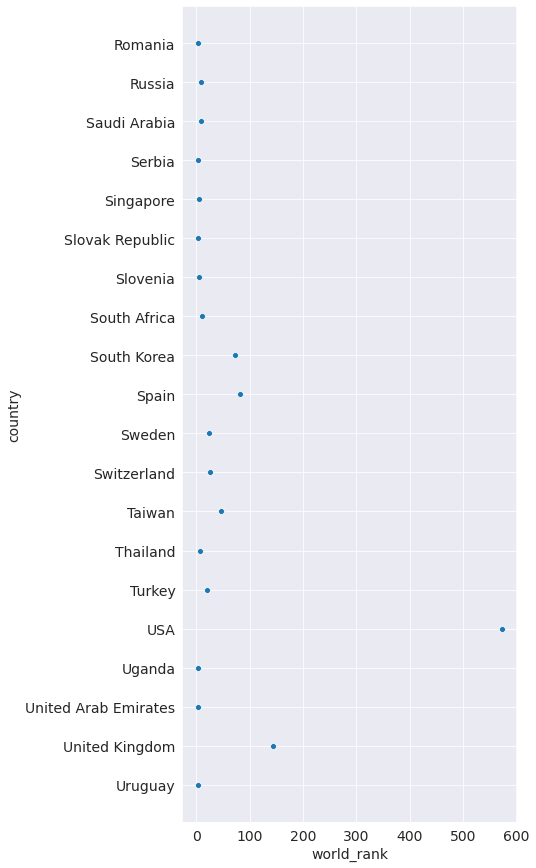

In [40]:

plt.figure(figsize=(6, 15))
sns.scatterplot(different_countries.world_rank,different_countries.country.head(20));

What is the quality of education in each university?

In [53]:
university_df['country'].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
South Korea              72
Canada                   72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Ireland                  16
Iran                     16
Portugal                 14
Greece                   14
New Zealand              12
Hong Kong                12
Denmark                  12
Norway                   12
Hungary                  12
Czech Republic           10
South Africa             10
Russia                    9
Egypt               

<AxesSubplot:xlabel='quality_of_education', ylabel='country'>

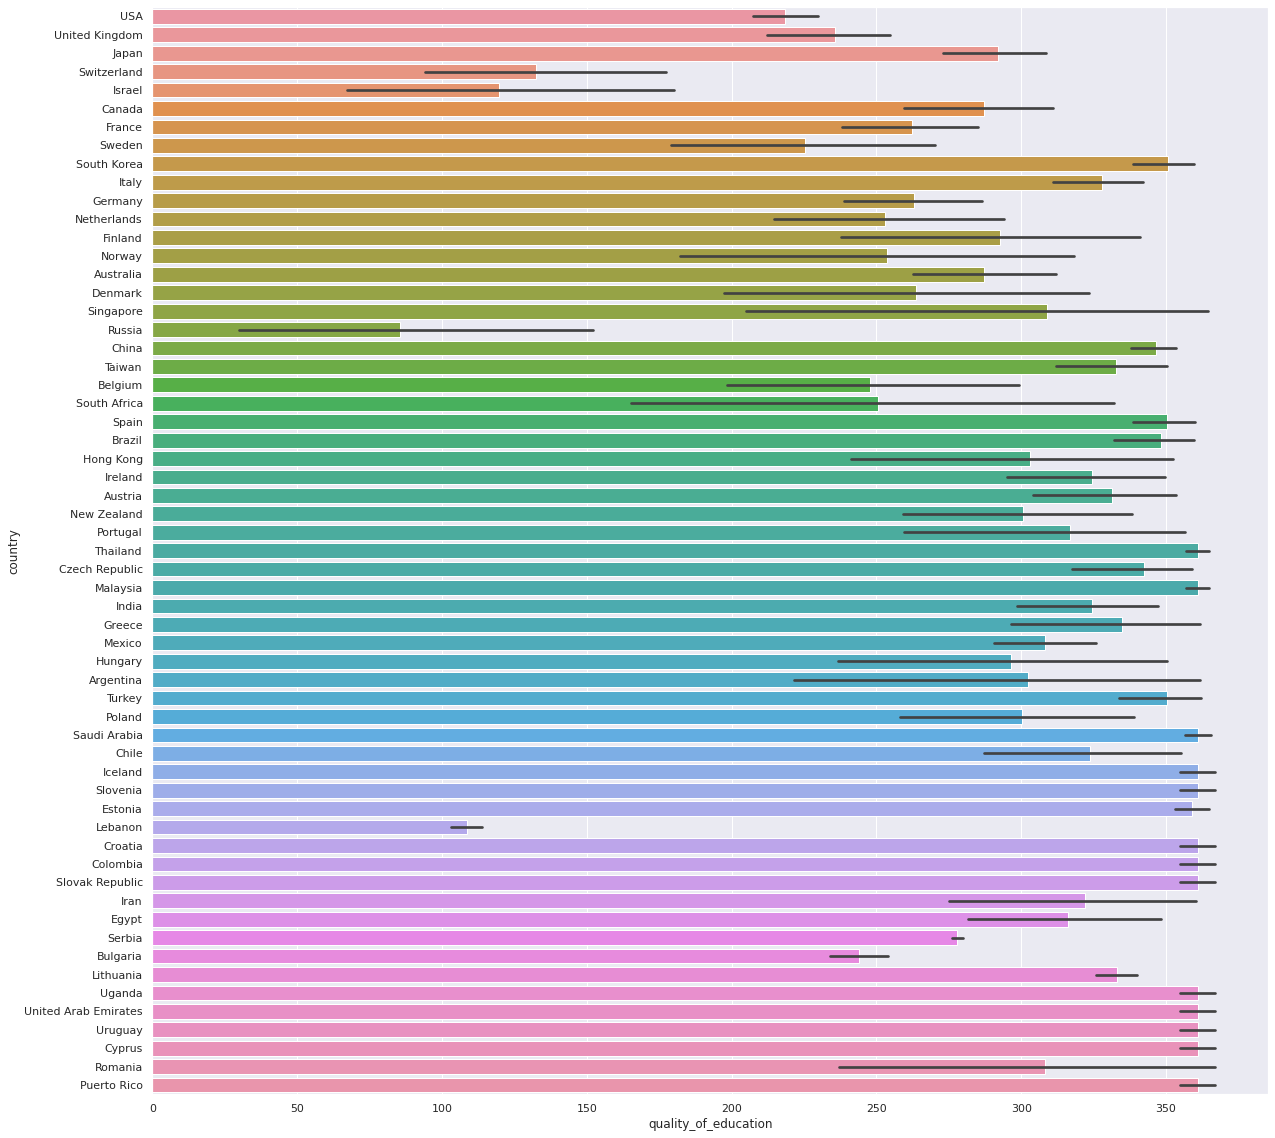

In [68]:
## Visual representation of the context

plt.figure(figsize=(20,20))
sns.barplot(y = 'country',x = 'quality_of_education', data=university_df)


What is the quality of faculty in each country?

In [64]:
university_df['country'].value_counts()
university_df['quality_of_faculty'].value_counts()

210    792
218    783
101     47
116     11
126      7
      ... 
161      1
212      1
167      1
171      1
217      1
Name: quality_of_faculty, Length: 199, dtype: int64

<AxesSubplot:xlabel='quality_of_faculty', ylabel='country'>

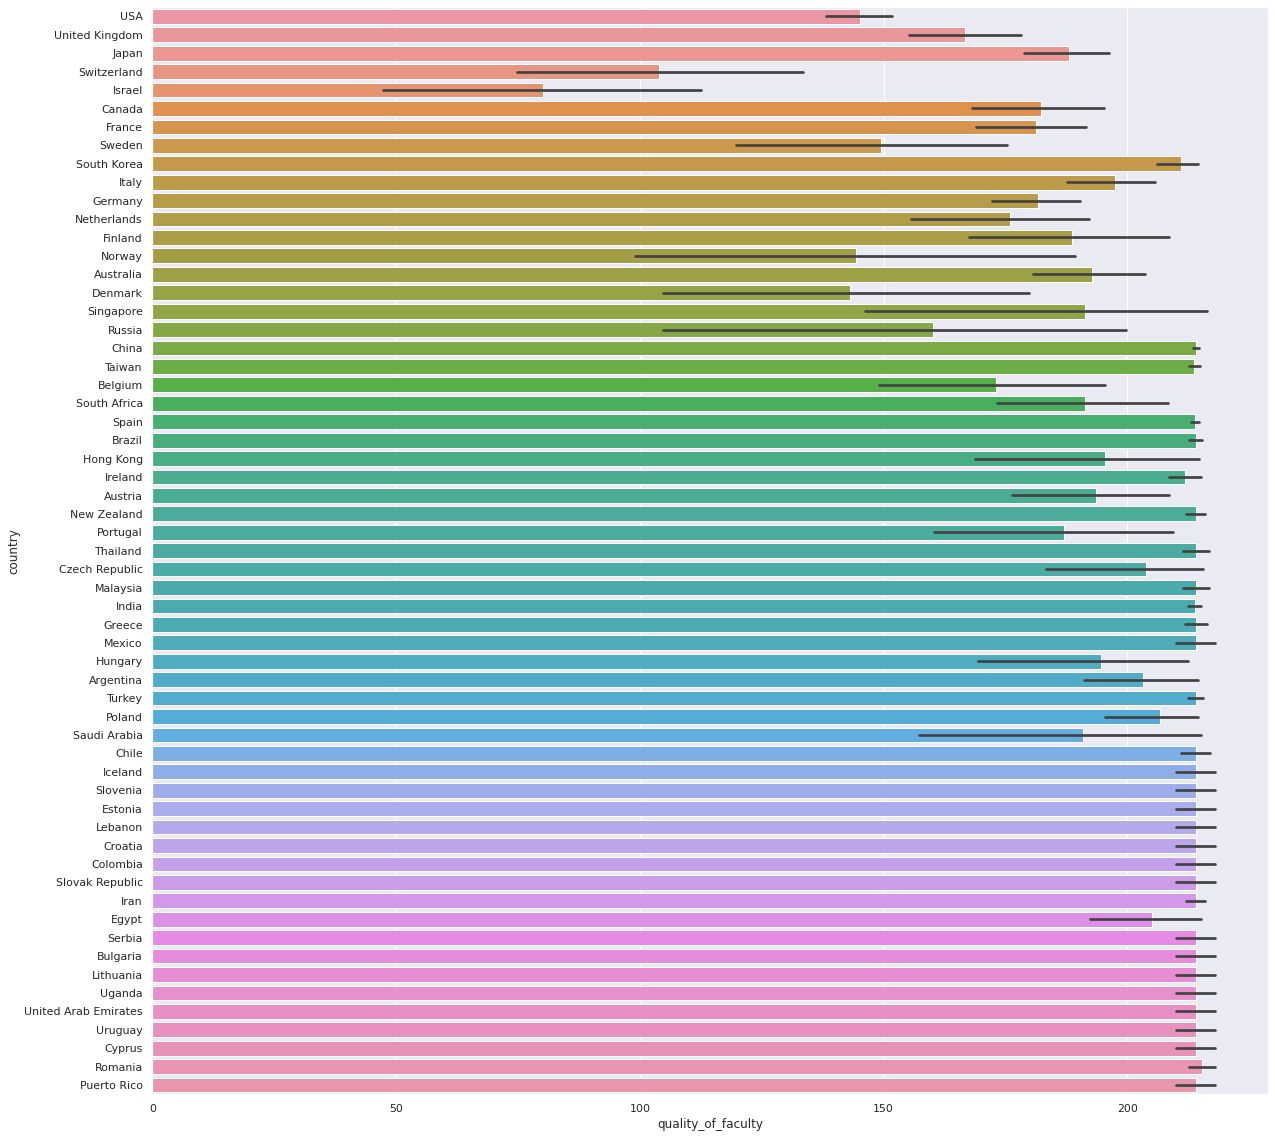

In [69]:
plt.figure(figsize=(20,20))
sns.barplot(y = 'country',x = 'quality_of_faculty', data=university_df)

What is the alumni employement of each university?

In [76]:
university_df['country'].value_counts()
university_df['alumni_employment'].value_counts()

478    524
567    434
101    112
14       4
13       4
      ... 
526      1
524      1
522      1
520      1
546      1
Name: alumni_employment, Length: 565, dtype: int64

<AxesSubplot:xlabel='alumni_employment', ylabel='country'>

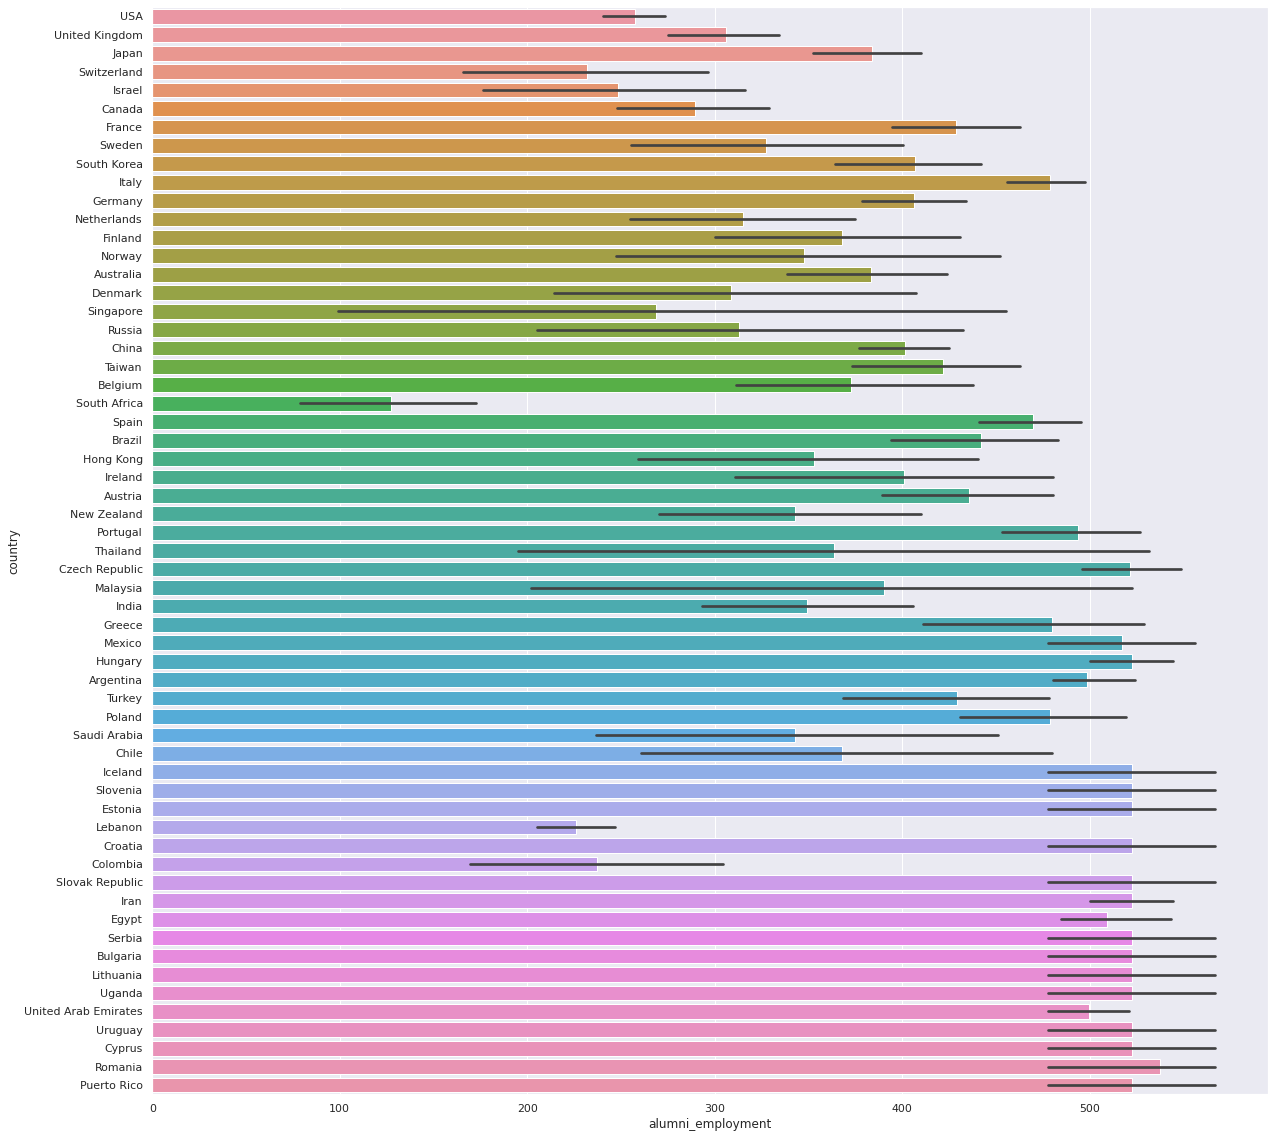

In [77]:
plt.figure(figsize=(20,20))
sns.barplot(y = 'country',x = 'alumni_employment', data=university_df)

Below is visual representation of complete cleaned data set

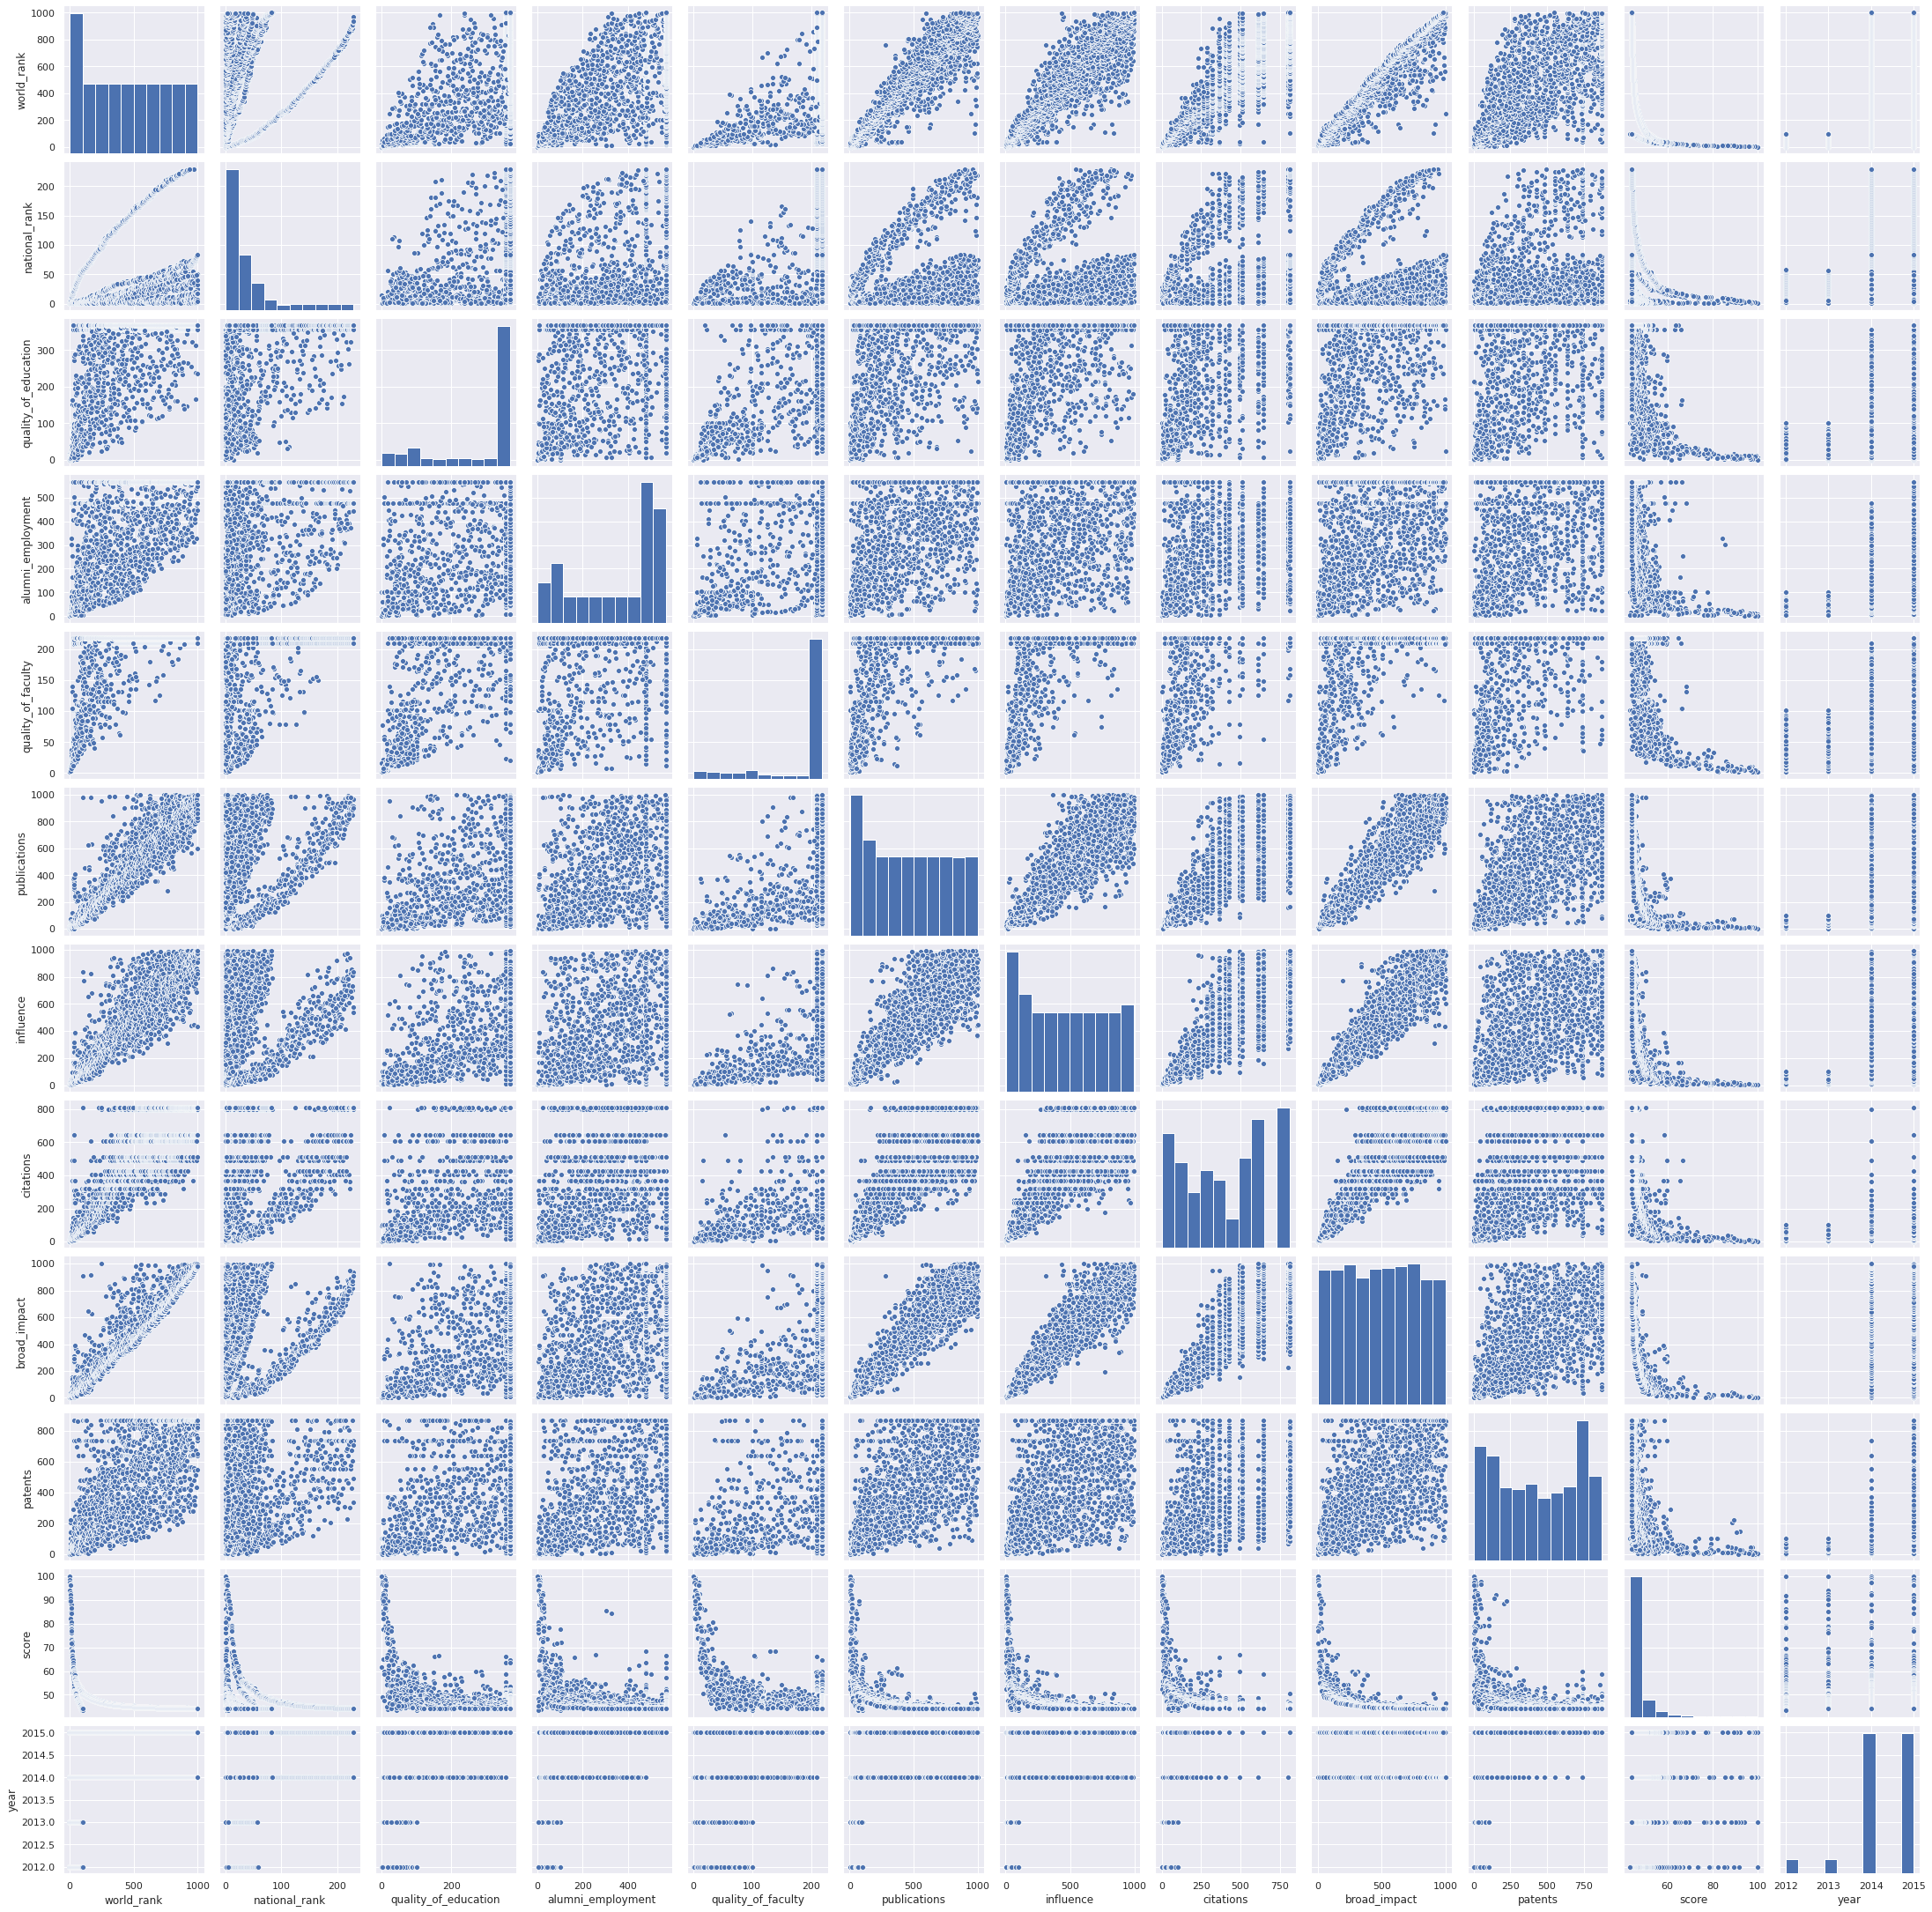

In [79]:
## A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

sns.pairplot(university_df);

Let us save and upload our work to Jovian before continuing

In [80]:
import jovian

In [81]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "um22012001/world-university-rankings" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/um22012001/world-university-rankings


'https://jovian.ml/um22012001/world-university-rankings'

In [82]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "um22012001/world-university-rankings" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/um22012001/world-university-rankings


'https://jovian.ml/um22012001/world-university-rankings'

## Inferences and Conclusion

In this project I have tried to analyse the dataset of World Universities. I have used various functions of python like numpy, matplotlib, pandas, seaborn to analyse our data effectively. While working on this project, i researched lot of information regarding pandas and plots.While doing this project I have realized that there is lot more to learn, I am excited to move forward in this journey of becoming a Data Analyst/Scientist.I have refered to the pandas notebook and visulization notes from zero to pandas project to finish this project, i have done lot research as well to the learn th concepts of pandas and numpy.

In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "um22012001/world-university-rankings" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/um22012001/world-university-rankings


'https://jovian.ml/um22012001/world-university-rankings'

## References and Future Work
Numerical computing with Numpy: https://jovian.ml/aakashns/python-numerical-computing-with-numpy

Analyzing tabular data with Pandas: https://jovian.ml/aakashns/python-pandas-data-analysis

Matplotlib & Seaborn tutorial: https://jovian.ml/aakashns/python-matplotlib-data-visualization

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

https://www.kaggle.com/mylesoneill/world-university-rankings(Dataset link)

In [86]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
